<a href="https://colab.research.google.com/github/dewirizki/DataMining_DreamHouse_Kelompok12/blob/main/Tugas_1_Datmin_Kelompok_12_DreamHouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install matplotlib

In [ ]:
pip install pandas

In [ ]:
pip install stats

In [ ]:
pip install more-itertools

In [ ]:
pip install seaborn

In [ ]:
pip install numpy

In [ ]:
pip install scikit-lego

In [ ]:
pip install scikit-mlm

  Using cached https://files.pythonhosted.org/packages/03/df/4beec31e0d421ee4daffc7838ca262b4811340acca83b689f4020f180e1f/scikit-mlm-0.1.1.tar.gz
  Using cached https://files.pythonhosted.org/packages/cc/34/64498f52ddfb0a22a22f2cfcc0b293c6864f6fcc664a53b4cce9302b59fc/fuzzy_c_means-1.2.4-py3-none-any.whl
ERROR: Could not find a version that satisfies the requirement mrsr>=0.0.3 (from scikit-mlm) (from versions: none)
ERROR: No matching distribution found for mrsr>=0.0.3 (from scikit-mlm)


In [ ]:
pip install pytest-warnings

In [ ]:
pip install scikit-learn

In [ ]:
pip install scikit-mlm

  Using cached https://files.pythonhosted.org/packages/03/df/4beec31e0d421ee4daffc7838ca262b4811340acca83b689f4020f180e1f/scikit-mlm-0.1.1.tar.gz
  Using cached https://files.pythonhosted.org/packages/cc/34/64498f52ddfb0a22a22f2cfcc0b293c6864f6fcc664a53b4cce9302b59fc/fuzzy_c_means-1.2.4-py3-none-any.whl
ERROR: Could not find a version that satisfies the requirement mrsr>=0.0.3 (from scikit-mlm) (from versions: none)
ERROR: No matching distribution found for mrsr>=0.0.3 (from scikit-mlm)


In [ ]:
import warnings; warnings.simplefilter('ignore')
import scipy, itertools, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

plt.style.use('bmh'); sns.set()

###### Meng-input dataset jual.csv yang merupakan sekumpulan data iklan penjualan rumah di Kota Maluku dan sekitarnya, yang diperoleh dengan mengumpulkan data iklan dari beberapa website. Dengan rentang waktu iklan dari tahun 2017 hingga 2021.

In [ ]:
# Importing CSV data  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
try:
    # Running Locally 
    rumah = pd.read_csv('main/jual.csv')
except:
    # Running in Google Colab
    !mkdir main
    !wget -P main/ https://raw.githubusercontent.com/dewirizki/DataMining_DreamHouse_Kelompok12/main/jual.csv
    rumah = pd.read_csv('main/jual.csv')

###### Mengetahui jumlah baris dan kolom pada dataset.

In [ ]:
# Tipe Datanya : DataFrame (df)
print(type(rumah))
# Ukuran Data
N, P = rumah.shape
'baris = ', N, ', Kolom = ', P

<class 'pandas.core.frame.DataFrame'>


('baris = ', 50, ', Kolom = ', 17)

In [ ]:
rumah.head(7)

,no,Tgl_Iklan,url,Harga_juta,Kota_Provinsi,Luas_Tanah,Luas_Bangunan,KT,KM,KTP,KMP,Carport,Garasi,Listrik,Surat,Judul,Deskripsi
0,1,08/04/2021,https://www.realoka.com/82784-dijual-disewa-ru...,1200,"Ambon, Maluku",135.0,70.0,2,2,1,0,1,0,1300.0,SHM,Dijual Disewa Rumah di Citraland Ambon Pr1699,Peminat Serius Hubungi:\r\nIbu Ata\r\n0851-012...
1,2,04/04/2021,https://www.olx.co.id/item/rumah-di-citraland-...,1110,"Ambon, Maluku",135.0,70.0,3,2,0,0,1,0,NaN,SHM,Rumah di Citraland Ambon,"Pemilik langsung, tanpa perantara. Lokasi Stra..."
2,3,22/03/2021,https://www.olx.co.id/item/di-jual-rumah-tingg...,2100,"Tual, Maluku",875.0,220.0,3,3,0,0,1,1,2200.0,SHM,Di Jual Rumah Tinggal Di BTN Indah Tual,Sertifikat SHM ( Sertifikat Hak Milik ). Harga...
3,4,17/03/2021,https://rumah.trovit.co.id/listing/rumah-belan...,12000,"Ambon, Maluku",360.0,300.0,5,2,0,0,3,0,NaN,NaN,"Rumah Belanda Sayap Riau Terawat, Belitung, Am...",Luas Tanah 360m Bangunan 300m Kamar Tidur 5 Ma...
4,5,17/03/2021,https://rumah.trovit.co.id/listing/dijual-ruma...,1250,Maluku Tengah,120.0,542.0,3,2,0,0,0,0,NaN,SHM,Dijual Rumah Potensi Pebisnis,"Jual Rumah 3Kamar, 2 kamar mandi\r\nSpesifikas..."
5,6,14/03/2021,https://www.dotproperty.id/rumah-dijual-dengan...,15000,"Ambon, Maluku",500.0,255.0,5,4,0,0,0,6,4400.0,SHM,"Rumah dijual Cepat Tanpa Perantara-SHM, Karang...",Rumah dijual dengan 5 kamar tidur di Karang Pa...
6,7,10/03/2021,https://www.99.co/id/properti/rumah-dijual-1-1...,1100,"Ambon, Maluku",134.0,250.0,3,2,0,0,0,0,2200.0,SHM,"Rumah Murah di karang panjang, Ambon Maluku",Dijual rumah Murah di Karang Panjang ambon Mal...


###### Berdasarkan output diatas, disimpulkan bahwa dataset tersebut memeiliki 17 varibel, antara lain: no, Tgl_iklan, url, Harga_juta, Kota_Provinsi, Luas_Tanah, Luas_Bangunan, KM, KT, KMP, KTP, Carport, Garasi, Listrik, Judul, Deskripsi.

In [ ]:
rumah.tail(5)

,no,Tgl_Iklan,url,Harga_juta,Kota_Provinsi,Luas_Tanah,Luas_Bangunan,KT,KM,KTP,KMP,Carport,Garasi,Listrik,Surat,Judul,Deskripsi
45,46,04/07/2018,https://dagymoiproperti.wordpress.com/2018/07/...,785,"Ternate, Maluku Utara",120.0,120.0,4,3,0,0,1,0,NaN,SHM,"Update Harga Perumahan Dagymoi Green Village, ...",Sertifikat Hak Milik \r\n➡4 kamar tidur \r\n➡3...
46,47,25/02/2018,https://dagymoiproperti.wordpress.com/2018/02/...,300,"Ternate, Maluku Utara",98.0,70.0,2,2,0,0,1,0,1100.0,SHM,Jambula Residence (SOLD),Tipe 70 Jambula Residence. Fasilitas : 2 kamar...
47,48,25/02/2018,https://dagymoiproperti.wordpress.com/2018/02/...,168,"Bacan, Maluku Utara",36.0,98.0,2,1,0,0,1,0,NaN,SHM,"Marabose Permai, Bacan Halsel",Perumahan Marabose Permai berlokasi di Kota Ba...
48,49,25/02/2018,https://dagymoiproperti.wordpress.com/2018/02/...,141,"Ternate, Maluku Utara",87.0,36.0,2,1,0,0,1,0,1100.0,SHM,Jambula Residence (SOLD),Tipe 36 Jambula Residence.Cicilan 870rb-an/bul...
49,50,26/08/2017,umah.waa2.co.id/detail?id=a04cea79e83644265109...,900,"Ambon, Maluku",314.0,300.0,8,5,0,0,0,0,NaN,NaN,Rumah dijual rumah kos dijual investasi cerdas...,Rumah dijual rumah kos dijual investasi cerdas...


In [ ]:
rumah.sample(10)

,no,Tgl_Iklan,url,Harga_juta,Kota_Provinsi,Luas_Tanah,Luas_Bangunan,KT,KM,KTP,KMP,Carport,Garasi,Listrik,Surat,Judul,Deskripsi
39,40,07/05/2019,https://dagymoiproperti.wordpress.com/2019/05/...,168,"Ternate, Maluku Utara",84.0,36.0,2,1,0,0,1,0,1300.0,NaN,Soft Launching Perumahan Bhayangkara Grha Dgym...,Perumahan dengan harga Jual Subsidi Type 36/85...
12,13,07/03/2021,https://www.olx.co.id/item/jual-bangunan-dan-t...,3500,"Ambon, Maluku",387.0,85.0,10,4,0,0,0,0,NaN,SHM,Jual bangunan dan tanah Depan pintu masuk rekt...,Luas tanah 387 m2. Bangunan 85 m2. Sertifikat ...
32,33,10/08/2020,http://citralandambon.com/read/2019/03/22/31/S...,1130,"Ambon, Maluku",135.0,72.0,2,1,1,1,1,0,1300.0,SHM,SAPPHIRE (LB. 70 M2 | LT. 135 M2),SPESIFIKASI BANGUNAN \r\n\r\nPONDASI : Batu Ka...
24,25,22/01/2021,https://www.olx.co.id/item/rumah-prospek-bange...,2400,"Ambon, Maluku",800.0,660.0,6,5,0,0,8,1,NaN,SHM,Rumah prospek banget Masih bisa Nego - Lokasi ...,Yang Bantu Jualkan dapat 1% Dari Harga Jual (k...
44,45,04/07/2018,https://dagymoiproperti.wordpress.com/2018/07/...,495,"Ternate, Maluku Utara",98.0,70.0,3,2,0,0,1,0,NaN,SHM,"Update Harga Perumahan Dagymoi Green Village, ...",Sertifikat Hak Milik \r\n➡3 kamar tidur \r\n➡2...
4,5,17/03/2021,https://rumah.trovit.co.id/listing/dijual-ruma...,1250,Maluku Tengah,120.0,542.0,3,2,0,0,0,0,NaN,SHM,Dijual Rumah Potensi Pebisnis,"Jual Rumah 3Kamar, 2 kamar mandi\r\nSpesifikas..."
8,9,08/03/2021,https://rumah.trovit.co.id/listing/rumah-dijua...,667,"Ambon, Maluku",NaN,NaN,2,1,0,0,0,0,NaN,NaN,RUMAH DIJUAL: CitraLand Ambon (Bay View City) ...,"5 menit ke PLN, Mal Ambon City Center, Rumah S..."
1,2,04/04/2021,https://www.olx.co.id/item/rumah-di-citraland-...,1110,"Ambon, Maluku",135.0,70.0,3,2,0,0,1,0,NaN,SHM,Rumah di Citraland Ambon,"Pemilik langsung, tanpa perantara. Lokasi Stra..."
20,21,26/02/2021,https://www.olx.co.id/item/tanah-dan-bangunan-...,780,"Ambon, Maluku",168.0,100.0,4,2,0,0,1,0,NaN,HGB,Tanah dan Bangunan Depan Jalan Utama,"Lokasi strategis tepat di Depan Jalan Utama, b..."
40,41,07/05/2019,https://dagymoiproperti.wordpress.com/2019/05/...,168,"Ternate, Maluku Utara",84.0,36.0,2,1,0,0,1,0,1300.0,NaN,Perumahan Sultan Residence - Kel. Sangaji Utar...,Perumahan dengan harga Jual Subsidi type 36/85...


In [ ]:
rumah.columns

Index(['no', 'Tgl_Iklan', 'url', 'Harga_juta', 'Kota_Provinsi', 'Luas_Tanah',
       'Luas_Bangunan', 'KT', 'KM', 'KTP', 'KMP', 'Carport', 'Garasi',
       'Listrik', 'Surat', 'Judul', 'Deskripsi'],
      dtype='object')

###### Melakukan penghapusan pada kolom yang tidak digunakan dalam preprocessing data.

In [ ]:
# Drop kolom pertama karena tidak digunakan (hanya index)
rumah.drop("no", axis=1, inplace=True)

###### Memeriksa tipe data pada setiap variabel.

In [ ]:
# tipe data di setiap kolom
# Wajib di periksa apakah tipe datanya sudah tepat?
# Perhatikan df sebagaimana semua variable di Python diperlakukan seperti object
rumah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tgl_Iklan      50 non-null     object 
 1   url            50 non-null     object 
 2   Harga_juta     50 non-null     int64  
 3   Kota_Provinsi  50 non-null     object 
 4   Luas_Tanah     48 non-null     float64
 5   Luas_Bangunan  47 non-null     float64
 6   KT             50 non-null     int64  
 7   KM             50 non-null     int64  
 8   KTP            50 non-null     int64  
 9   KMP            50 non-null     int64  
 10  Carport        50 non-null     int64  
 11  Garasi         50 non-null     int64  
 12  Listrik        24 non-null     float64
 13  Surat          41 non-null     object 
 14  Judul          49 non-null     object 
 15  Deskripsi      50 non-null     object 
dtypes: float64(3), int64(7), object(6)
memory usage: 6.4+ KB


In [ ]:
rumah.dtypes

Tgl_Iklan         object
url               object
Harga_juta         int64
Kota_Provinsi     object
Luas_Tanah       float64
Luas_Bangunan    float64
KT                 int64
KM                 int64
KTP                int64
KMP                int64
Carport            int64
Garasi             int64
Listrik          float64
Surat             object
Judul             object
Deskripsi         object
dtype: object

# Mengganti Tipe Data

###### Mengubah tipe data variabel "Tgl_Iklan" dan "Surat" menjadi datetime64 serta category. 

In [ ]:
# dataframe types: https://pbpython.com/pandas_dtypes.html
# mengubah tipe data variabel 'Tgl_Iklan' dan 'Surat'
rumah['Tgl_Iklan'] = rumah['Tgl_Iklan'].astype('datetime64')
rumah['Surat'] = rumah['Surat'].astype('category')
rumah.dtypes

Tgl_Iklan        datetime64[ns]
url                      object
Harga_juta                int64
Kota_Provinsi            object
Luas_Tanah              float64
Luas_Bangunan           float64
KT                        int64
KM                        int64
KTP                       int64
KMP                       int64
Carport                   int64
Garasi                    int64
Listrik                 float64
Surat                  category
Judul                    object
Deskripsi                object
dtype: object

# Memeriksa Duplikasi Data

###### Berdasarkan dataset yang digunakan, alangkah baiknya tidak terdapat data yang terduplikasi.

In [ ]:
#mengecek adanya duplikasi data atau tidak
print(rumah.shape)
rumah.duplicated().sum()

(50, 16)


0

In [ ]:
#menghapus entri yang memiliki data duplikat
rumah.drop_duplicates(inplace=True)
print(rumah.duplicated().sum())
print(rumah.shape)

0
(50, 16)


In [ ]:
#Memilih hanya variable dengan tipe tertentu
rumah_num = rumah.select_dtypes(include=['float64', 'int64'])
rumah_num.head()

,Harga_juta,Luas_Tanah,Luas_Bangunan,KT,KM,KTP,KMP,Carport,Garasi,Listrik
0,1200,135.0,70.0,2,2,1,0,1,0,1300.0
1,1110,135.0,70.0,3,2,0,0,1,0,NaN
2,2100,875.0,220.0,3,3,0,0,1,1,2200.0
3,12000,360.0,300.0,5,2,0,0,3,0,NaN
4,1250,120.0,542.0,3,2,0,0,0,0,NaN


In [ ]:
#memilih hanya variable dengan tipe tertentu
rumah_obj = rumah.select_dtypes(include = [object])
rumah_obj.head()

,url,Kota_Provinsi,Judul,Deskripsi
0,https://www.realoka.com/82784-dijual-disewa-ru...,"Ambon, Maluku",Dijual Disewa Rumah di Citraland Ambon Pr1699,Peminat Serius Hubungi:\r\nIbu Ata\r\n0851-012...
1,https://www.olx.co.id/item/rumah-di-citraland-...,"Ambon, Maluku",Rumah di Citraland Ambon,"Pemilik langsung, tanpa perantara. Lokasi Stra..."
2,https://www.olx.co.id/item/di-jual-rumah-tingg...,"Tual, Maluku",Di Jual Rumah Tinggal Di BTN Indah Tual,Sertifikat SHM ( Sertifikat Hak Milik ). Harga...
3,https://rumah.trovit.co.id/listing/rumah-belan...,"Ambon, Maluku","Rumah Belanda Sayap Riau Terawat, Belitung, Am...",Luas Tanah 360m Bangunan 300m Kamar Tidur 5 Ma...
4,https://rumah.trovit.co.id/listing/dijual-ruma...,Maluku Tengah,Dijual Rumah Potensi Pebisnis,"Jual Rumah 3Kamar, 2 kamar mandi\r\nSpesifikas..."


In [ ]:
# Memilih hanya variable dengan tipe tertentu
rumah_cat = rumah.select_dtypes(include = ['category'])
rumah_cat.head()

,Surat
0,SHM
1,SHM
2,SHM
3,NaN
4,SHM


###### Mengubah kategori data dalam variabel surat yang bersifat kualitatif menjadi kuantitatif.

In [ ]:
df = pd.get_dummies(rumah['Surat'], prefix='Sertif')
df.head()

,Sertif_AJB/BPHTB,Sertif_HGB,Sertif_SHM
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,0
4,0,0,1


In [ ]:
df2 = pd.concat([rumah, df], axis = 1)
df2.head().transpose()

,0,1,2,3,4
Tgl_Iklan,2021-08-04 00:00:00,2021-04-04 00:00:00,2021-03-22 00:00:00,2021-03-17 00:00:00,2021-03-17 00:00:00
url,https://www.realoka.com/82784-dijual-disewa-ru...,https://www.olx.co.id/item/rumah-di-citraland-...,https://www.olx.co.id/item/di-jual-rumah-tingg...,https://rumah.trovit.co.id/listing/rumah-belan...,https://rumah.trovit.co.id/listing/dijual-ruma...
Harga_juta,1200,1110,2100,12000,1250
Kota_Provinsi,"Ambon, Maluku","Ambon, Maluku","Tual, Maluku","Ambon, Maluku",Maluku Tengah
Luas_Tanah,135,135,875,360,120
Luas_Bangunan,70,70,220,300,542
KT,2,3,3,5,3
KM,2,2,3,2,2
KTP,1,0,0,0,0
KMP,0,0,0,0,0


In [ ]:
# Choosing some columns manually
X = rumah[['Harga_juta','Luas_Tanah']]
X[:7]

,Harga_juta,Luas_Tanah
0,1200,135.0
1,1110,135.0
2,2100,875.0
3,12000,360.0
4,1250,120.0
5,15000,500.0
6,1100,134.0


# Apakah ada kecenderungan perbedaan harga rumah akibat dari jenis sertifikat rumah?

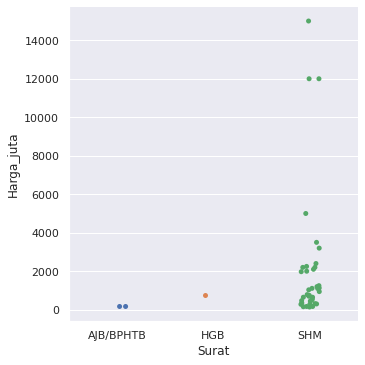

In [ ]:
p= sns.catplot(x="Surat", y="Harga_juta", data=rumah)
# Apa yang bisa dilihat dari hasil ini?

###### Berdasarkan output diatas, terlihat bahwa terdapat outlier pada jenis sertifikat rumah "SHM"

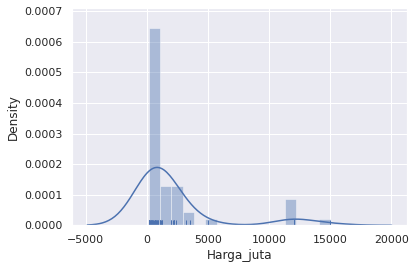

In [ ]:
#Distributions
p = sns.distplot(rumah['Harga_juta'],kde=True, rug=True)

# **Menghapus Outlier pada Variabel "Harga_juta"**

In [ ]:
# Misal dengan asumsi data berdistribusi normal
# dan menggunakan 95% confidence interval di sekitar variabel "harga"

df3 = np.abs(rumah.Harga_juta - rumah.Harga_juta.mean())<=(2*rumah.Harga_juta.std())
# mu-2s<x<mu+2s
print(df3.shape)
df3.head()

(50,)


0      True
1      True
2      True
3     False
4      True
5     False
6      True
7      True
8      True
9      True
10    False
11     True
12     True
13    False
14     True
15     True
16     True
17     True
Name: Harga_juta, dtype: bool

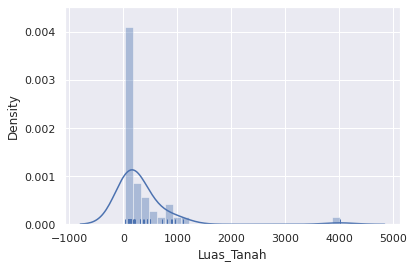

In [ ]:
# Distributions
p = sns.distplot(rumah['Luas_Tanah'], kde=True, rug=True)

# **Menghapus Outlier pada Variabel "Luas_Tanah"**

In [ ]:
# Misal dengan asumsi data berdistribusi normal
# dan menggunakan 95% confidence interval di sekitar variabel "Luas_Tanah"

df4 = np.abs(rumah.Luas_Tanah - rumah.Luas_Tanah.mean())<=(2*rumah.Luas_Tanah.std())
# mu-2s<x<mu+2s
print(df4.shape)
df4.head()

(50,)


0    True
1    True
2    True
3    True
4    True
Name: Luas_Tanah, dtype: bool

In [ ]:
rumah3 = rumah[df3] # Data tanpa outliers  #untuk variabel 'Harga_juta'
print(rumah3.shape, rumah.shape)
# Perhatikan disini sengaja data yang telah di remove outliernya 
# disimpan dalam variabel baru "rumah3"
# Jika datanya besar hati-hati melakukan hal ini

(45, 16) (50, 16)


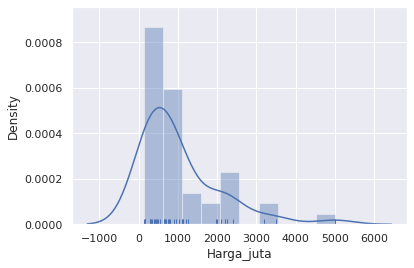

In [ ]:
# Distributions
p = sns.distplot(rumah3['Harga_juta'], kde=True, rug=True)

In [ ]:
rumah2 = rumah[df4] # Data tanpa outliers #Variabel Luas_Tanah
print(rumah2.shape, rumah.shape)
# Perhatikan disini sengaja data yang telah di remove outliernya 
# disimpan dalam variabel baru "rumah2"
# Jika datanya besar hati-hati melakukan hal ini

(47, 16) (50, 16)


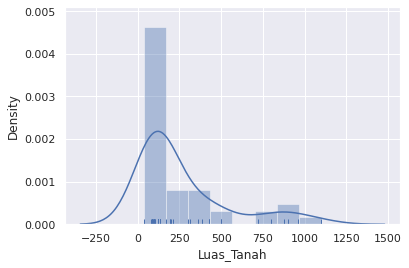

In [ ]:
# Distributions
p = sns.distplot(rumah2['Luas_Tanah'], kde=True, rug=True)

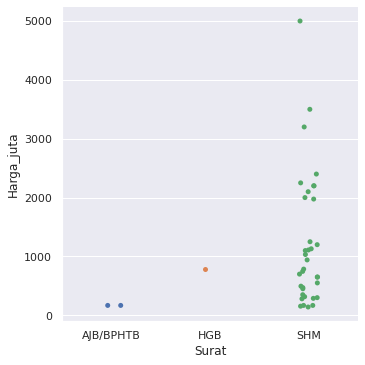

In [ ]:
p= sns.catplot(x="Surat", y="Harga_juta", data=rumah3)

###### Berdasarkan output diatas dapat terlihat bahwa outlier telah dihilangkan, namun outlier dapat diolah secara terpisah untuk memperoleh informasi baru. Akan tetapi kali ini hanya dilakukan penghilangan outlier saja.

# Memeriksa Missing Values

###### Memeriksa banyaknya *missing value* pada setiap variabel di Dataset yang telah dihilangkan outlier pada varibel "Luas_Tanah".

In [ ]:
# General Look at the Missing Values
print(rumah2.isnull().sum())

Tgl_Iklan         0
url               0
Harga_juta        0
Kota_Provinsi     0
Luas_Tanah        0
Luas_Bangunan     1
KT                0
KM                0
KTP               0
KMP               0
Carport           0
Garasi            0
Listrik          23
Surat             7
Judul             1
Deskripsi         0
dtype: int64


# Bagian Baru

In [ ]:
set(rumah3['Surat'])

{'AJB/BPHTB', 'HGB', 'SHM', nan}

###### Memeriksa banyaknya missing value pada setiap variabel di Dataset yang telah dihilangkan outlier pada varibel "Harga_juta".

In [ ]:
# General Look at the Missing Values
print(rumah3.isnull().sum())

Tgl_Iklan         0
url               0
Harga_juta        0
Kota_Provinsi     0
Luas_Tanah        2
Luas_Bangunan     2
KT                0
KM                0
KTP               0
KMP               0
Carport           0
Garasi            0
Listrik          23
Surat             7
Judul             1
Deskripsi         0
dtype: int64


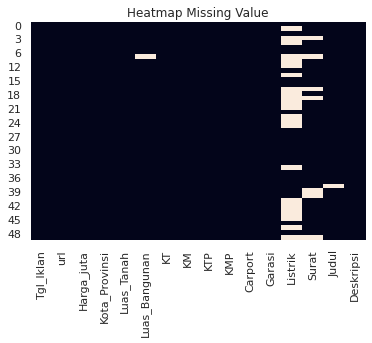

In [ ]:
sns.heatmap(rumah2.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

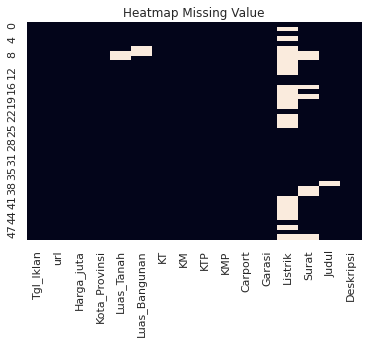

In [ ]:
sns.heatmap(rumah3.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

###### Melihat komposisi persentase missing value yang terdapat pada dataset

In [ ]:
(rumah3.isnull().sum()/len(rumah3)).to_frame('persentase missing')

,persentase missing
Tgl_Iklan,0.000000
url,0.000000
Harga_juta,0.000000
Kota_Provinsi,0.000000
Luas_Tanah,0.044444
Luas_Bangunan,0.044444
KT,0.000000
KM,0.000000
KTP,0.000000
KMP,0.000000


###### Berdasarkan output diatas, dapat dilihat bahwa masih terdapat beberapa variabel yang memiliki missing value. Oleh karena itu, dilakukan penghapusan kolom yang memiliki missing value lebih dari 50% yaitu kolom variabel listrik dengan persentase 51%.

# Menangani Missing Values

In [ ]:
# Drop kolom Listrik karena terdapat banyak missing value
rumah3.drop("Listrik", axis=1, inplace=True)

In [ ]:
# Drop kolom Listrik karena terdapat banyak missing value
rumah2.drop("Listrik", axis=1, inplace=True)

In [ ]:
rumah3.head()

,Tgl_Iklan,url,Harga_juta,Kota_Provinsi,Luas_Tanah,Luas_Bangunan,KT,KM,KTP,KMP,Carport,Garasi,Surat,Judul,Deskripsi
0,2021-08-04,https://www.realoka.com/82784-dijual-disewa-ru...,1200,"Ambon, Maluku",135.0,70.0,2,2,1,0,1,0,SHM,Dijual Disewa Rumah di Citraland Ambon Pr1699,Peminat Serius Hubungi:\r\nIbu Ata\r\n0851-012...
1,2021-04-04,https://www.olx.co.id/item/rumah-di-citraland-...,1110,"Ambon, Maluku",135.0,70.0,3,2,0,0,1,0,SHM,Rumah di Citraland Ambon,"Pemilik langsung, tanpa perantara. Lokasi Stra..."
2,2021-03-22,https://www.olx.co.id/item/di-jual-rumah-tingg...,2100,"Tual, Maluku",875.0,220.0,3,3,0,0,1,1,SHM,Di Jual Rumah Tinggal Di BTN Indah Tual,Sertifikat SHM ( Sertifikat Hak Milik ). Harga...
4,2021-03-17,https://rumah.trovit.co.id/listing/dijual-ruma...,1250,Maluku Tengah,120.0,542.0,3,2,0,0,0,0,SHM,Dijual Rumah Potensi Pebisnis,"Jual Rumah 3Kamar, 2 kamar mandi\r\nSpesifikas..."
6,2021-10-03,https://www.99.co/id/properti/rumah-dijual-1-1...,1100,"Ambon, Maluku",134.0,250.0,3,2,0,0,0,0,SHM,"Rumah Murah di karang panjang, Ambon Maluku",Dijual rumah Murah di Karang Panjang ambon Mal...


In [ ]:
# Ukuran Data
N, P = rumah3.shape
'baris = ', N, ', Kolom = ', P

('baris = ', 45, ', Kolom = ', 15)

In [ ]:
print(rumah3.isnull().sum())

Tgl_Iklan        0
url              0
Harga_juta       0
Kota_Provinsi    0
Luas_Tanah       2
Luas_Bangunan    2
KT               0
KM               0
KTP              0
KMP              0
Carport          0
Garasi           0
Surat            7
Judul            1
Deskripsi        0
dtype: int64


###### Berdasarkan output di atas, terlihat bahwa masih terdapat missing value pada variabel Luas_Tanah, Luas_Bangunan, Surat, Judul. Oleh karena itu, dilakukan penghapusan terhadap baris baris yang mengandung missing value.

In [ ]:
X = rumah3.dropna()

In [ ]:
print(X.isnull().sum())

Tgl_Iklan        0
url              0
Harga_juta       0
Kota_Provinsi    0
Luas_Tanah       0
Luas_Bangunan    0
KT               0
KM               0
KTP              0
KMP              0
Carport          0
Garasi           0
Surat            0
Judul            0
Deskripsi        0
dtype: int64


###### Setelah dilakukan penghapusan missing value dapat terlihat bahwa, sudah tidak ada missing value pada dataset.

In [ ]:
set(X['Surat'])

{'AJB/BPHTB', 'HGB', 'SHM'}

In [ ]:
X.head()

,Tgl_Iklan,url,Harga_juta,Kota_Provinsi,Luas_Tanah,Luas_Bangunan,KT,KM,KTP,KMP,Carport,Garasi,Surat,Judul,Deskripsi
0,2021-08-04,https://www.realoka.com/82784-dijual-disewa-ru...,1200,"Ambon, Maluku",135.0,70.0,2,2,1,0,1,0,SHM,Dijual Disewa Rumah di Citraland Ambon Pr1699,Peminat Serius Hubungi:\r\nIbu Ata\r\n0851-012...
1,2021-04-04,https://www.olx.co.id/item/rumah-di-citraland-...,1110,"Ambon, Maluku",135.0,70.0,3,2,0,0,1,0,SHM,Rumah di Citraland Ambon,"Pemilik langsung, tanpa perantara. Lokasi Stra..."
2,2021-03-22,https://www.olx.co.id/item/di-jual-rumah-tingg...,2100,"Tual, Maluku",875.0,220.0,3,3,0,0,1,1,SHM,Di Jual Rumah Tinggal Di BTN Indah Tual,Sertifikat SHM ( Sertifikat Hak Milik ). Harga...
4,2021-03-17,https://rumah.trovit.co.id/listing/dijual-ruma...,1250,Maluku Tengah,120.0,542.0,3,2,0,0,0,0,SHM,Dijual Rumah Potensi Pebisnis,"Jual Rumah 3Kamar, 2 kamar mandi\r\nSpesifikas..."
6,2021-10-03,https://www.99.co/id/properti/rumah-dijual-1-1...,1100,"Ambon, Maluku",134.0,250.0,3,2,0,0,0,0,SHM,"Rumah Murah di karang panjang, Ambon Maluku",Dijual rumah Murah di Karang Panjang ambon Mal...


###### Setelah dilakukan penghapusan missing value, baris data yang awalnya berjumlah 45 menjadi 36 baris data. Lalu, kolom data yang awalnya berjumlah 16 menjadi 15 kolom. 

In [ ]:
# Ukuran Data
N, P = X.shape
'baris = ', N, ', Kolom = ', P

('baris = ', 36, ', Kolom = ', 15)

# Statistika Deskriptif

In [ ]:
# Melihat Statistika Sederhana dari data "Numerik"-nya
X.describe(include='all')

,Tgl_Iklan,url,Harga_juta,Kota_Provinsi,Luas_Tanah,Luas_Bangunan,KT,KM,KTP,KMP,Carport,Garasi,Surat,Judul,Deskripsi
count,36,36,36.000000,36,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36,36,36
unique,24,31,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,31,34
top,2020-10-08 00:00:00,https://dagymoiproperti.wordpress.com/2018/07/...,NaN,"Ambon, Maluku",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SHM,"Update Harga Perumahan Dagymoi Green Village, ...",SPESIFIKASI BANGUNAN \r\n\r\nPONDASI : Batu Ka...
freq,5,4,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34,4,3
first,2018-02-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2021-10-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1144.444444,NaN,236.944444,180.666667,3.055556,1.916667,0.055556,0.027778,1.138889,0.138889,NaN,NaN,NaN
std,NaN,NaN,1102.157999,NaN,273.774354,238.879886,1.819646,1.180194,0.232311,0.166667,1.376388,0.424451,NaN,NaN,NaN
min,NaN,NaN,141.000000,NaN,36.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,341.500000,NaN,98.000000,44.500000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,NaN,NaN,NaN


In [ ]:
#statistik sederhana seluruh datanya
X[['Harga_juta','Luas_Tanah']].describe(include='all')

,Harga_juta,Luas_Tanah
count,36.000000,36.000000
mean,1144.444444,236.944444
std,1102.157999,273.774354
min,141.000000,36.000000
25%,341.500000,98.000000
50%,763.000000,120.000000
75%,1431.250000,196.250000
max,5000.000000,1100.000000


# Visualisasi Data

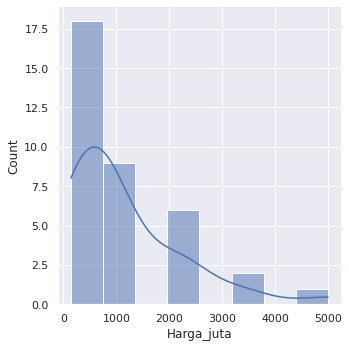

In [ ]:
col = "Harga_juta"
plot = sns.displot(data=X, x=col, kde=True)

###### Berdasarkan hasil visualisasi di atas, terlihat bahwa harga rumah yang kurang dari 1 Milyar memiliki frekuensi terbanyak.

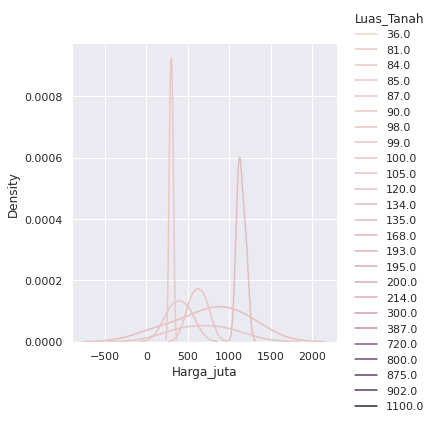

In [ ]:
plot = sns.displot(data=X, x=col, hue='Luas_Tanah', kind="kde")

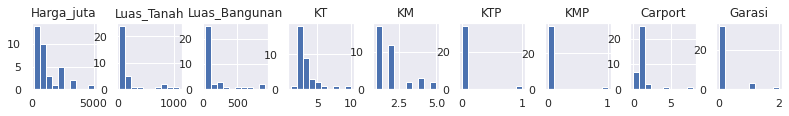

In [ ]:
numerical = X.select_dtypes(include = ['int64','float64']).columns

X[numerical].hist(figsize=(15, 6), layout=(4, 10));

# Scatter Plot Variabel 'Harga_Juta' dan 'Luas_Tanah'

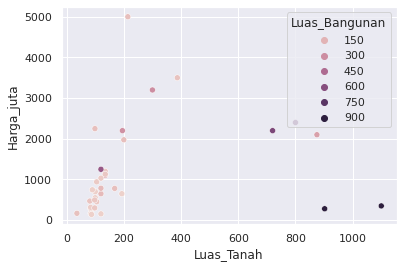

In [ ]:
p = sns.scatterplot(x=X['Luas_Tanah'], y=X['Harga_juta'], hue=X['Luas_Bangunan'])

###### Berdasarkan hasil scatter plot diatas, terlihat bahwa terdapat hubungan posistif antara variabel Luas_Tanah dengan Harga_juta karena titik-titik plot data membentuk pola garis lurus dari kiri bawah naik ke kanan atas.
###### Catatan: 


*   Untuk yang ingin membeli rumah, terdapat dua rumah yang memiliki luas sekitar 1000 m2 dengan luas bangunan sekitar 900m2 yang mana seharga kurang dari 1 Miliar, yang mungkin cocok untuk dibeli dan menjadi investasi.



# Joint Plot Variabel 'Luas_Tanah' dan 'Harga_juta'

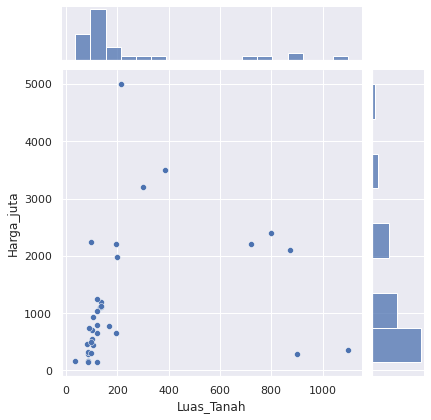

In [ ]:
p = sns.jointplot(x=X['Luas_Tanah'], y=X['Harga_juta'])

#Tabel Korelasi Antarvariabel

In [ ]:
X.corr()

,Harga_juta,Luas_Tanah,Luas_Bangunan,KT,KM,KTP,KMP,Carport,Garasi
Harga_juta,1.000000,0.239858,0.130501,0.673451,0.770634,0.004588,-0.002247,0.386153,0.389520
Luas_Tanah,0.239858,1.000000,0.839014,0.294454,0.260580,-0.091593,-0.063834,0.250160,0.548366
Luas_Bangunan,0.130501,0.839014,1.000000,0.241668,0.211201,-0.112924,-0.077983,0.206007,0.433016
KT,0.673451,0.294454,0.241668,1.000000,0.813779,-0.142688,-0.099444,0.316251,0.285667
KM,0.770634,0.260580,0.211201,0.813779,1.000000,-0.086842,-0.133150,0.552583,0.365983
KTP,0.004588,-0.091593,-0.112924,-0.142688,-0.086842,1.000000,0.696932,-0.024821,-0.080488
KMP,-0.002247,-0.063834,-0.077983,-0.099444,-0.133150,0.696932,1.000000,-0.017299,-0.056095
Carport,0.386153,0.250160,0.206007,0.316251,0.552583,-0.024821,-0.017299,1.000000,0.308380
Garasi,0.389520,0.548366,0.433016,0.285667,0.365983,-0.080488,-0.056095,0.308380,1.000000


# Heat Map

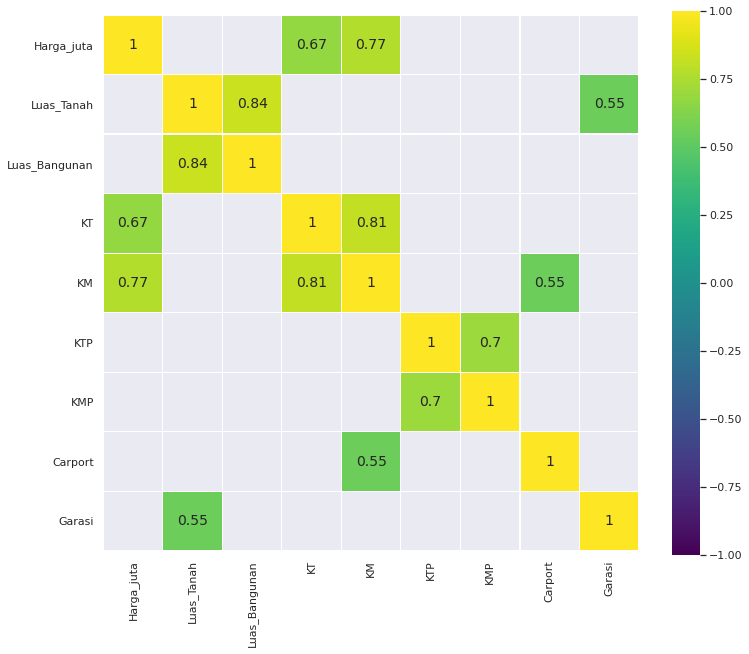

In [ ]:
# HeatMap untuk menyelidiki korelasi
corr2 = X.corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))
sns.heatmap(corr2[(corr2 >= 0.5) | (corr2 <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 14}, square=True);

# Kesimpulan

##### Dari 50 data iklan penjualan rumah di Maluku, ditemukan 3 data yang merupakan outlier, lalu kami me-remove outlier tersebut. Sehingga data yang diobservasi tersisa 47 data. Dari 47 data tersebut, terdapat 2 missing value pada variabel 'Luas_Tanah', 2 missing values pada variabel 'Luas_Bangunan', 23 missing values pada variabel 'Listrik', 7 missing value pada variabel 'Surat', dan 1 missing value pada variabel 'Judul'. Lalu kita menghapus data yang mengandung missing values dengan cara Menghapus Variabel 'Listrik', karena terdapat kurang lebih 50% data yang missing dan melakukan Listwise deletion pada variabel 'Surat', 'Luas_Bangunan", dan 'Luas_Tanah'. Setelah dilakukan penghapusan missing value, tersisa 36 baris dan 15 kolom data. Untuk melihat keragaman data, kami melakukan Stastistika deskriptif. Kami ingin mengetahui hubungan antara variabel 'Harga_juta' dan variabel 'Luas_Tanah', berdasarkan hasil visualisasi dengan menggunakan scatterplot diperoleh kesimpulan variabel 'Harga_juta' dengan variabel 'Luas_Tanah' memiliki hubungan yang positif, bahwa semakin besar nilai luas tanah maka harga jual rumah juga semakin besar jika diasumsikan luas bangunan, kamar tidur, kamar mandi, kamar tidur pembantu, kamar mandi pembantu, carport, garasi, dan listrik sama. Berdasarkan tabel korelasi antarvariabel, diperoleh bahwa variabel 'Harga_juta' dengan 'KM' memiliki korelasi terbesar yaitu 0.77.

Rekomendasi untuk penjual rumah:
 
*   Dikarenakan korelasi yang tinggi antara variabel 'Harga_juta' dengan 'KM', kami merekomendasikan untuk menjual rumah dengan harga yang lebih tinggi jika terdapat fasilitas kamar mandi lebih banyak.



In [ ]:
# Run this cell ONLY if this notebook run from Google Colab
# Kalau dijalankan lokal (Anaconda/WinPython) maka silahkan install di terminal/command prompt 
# Lalu unduh secara manual file yang dibutuhkan dan letakkan di folder Python anda.
!pip install --upgrade umap-learn
!wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py

Requirement already up-to-date: umap-learn in /usr/local/lib/python3.7/dist-packages (0.5.1)
--2021-04-12 14:35:16--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17387 (17K) [text/plain]
Saving to: ‘tau_unsup.py.1’

tau_unsup.py.1      100%[===================>]  16.98K  --.-KB/s    in 0s      

2021-04-12 14:35:17 (41.5 MB/s) - ‘tau_unsup.py.1’ saved [17387/17387]



# Clustering Data

In [ ]:
# Importing Modules untuk Notebook ini
import warnings; warnings.simplefilter('ignore')
import umap, numpy as np, tau_unsup as tau, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
from sklearn import cluster, datasets
from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics.cluster import homogeneity_score as purity
from sklearn.metrics import normalized_mutual_info_score as NMI 

sns.set(style="ticks", color_codes=True)
random_state = 99

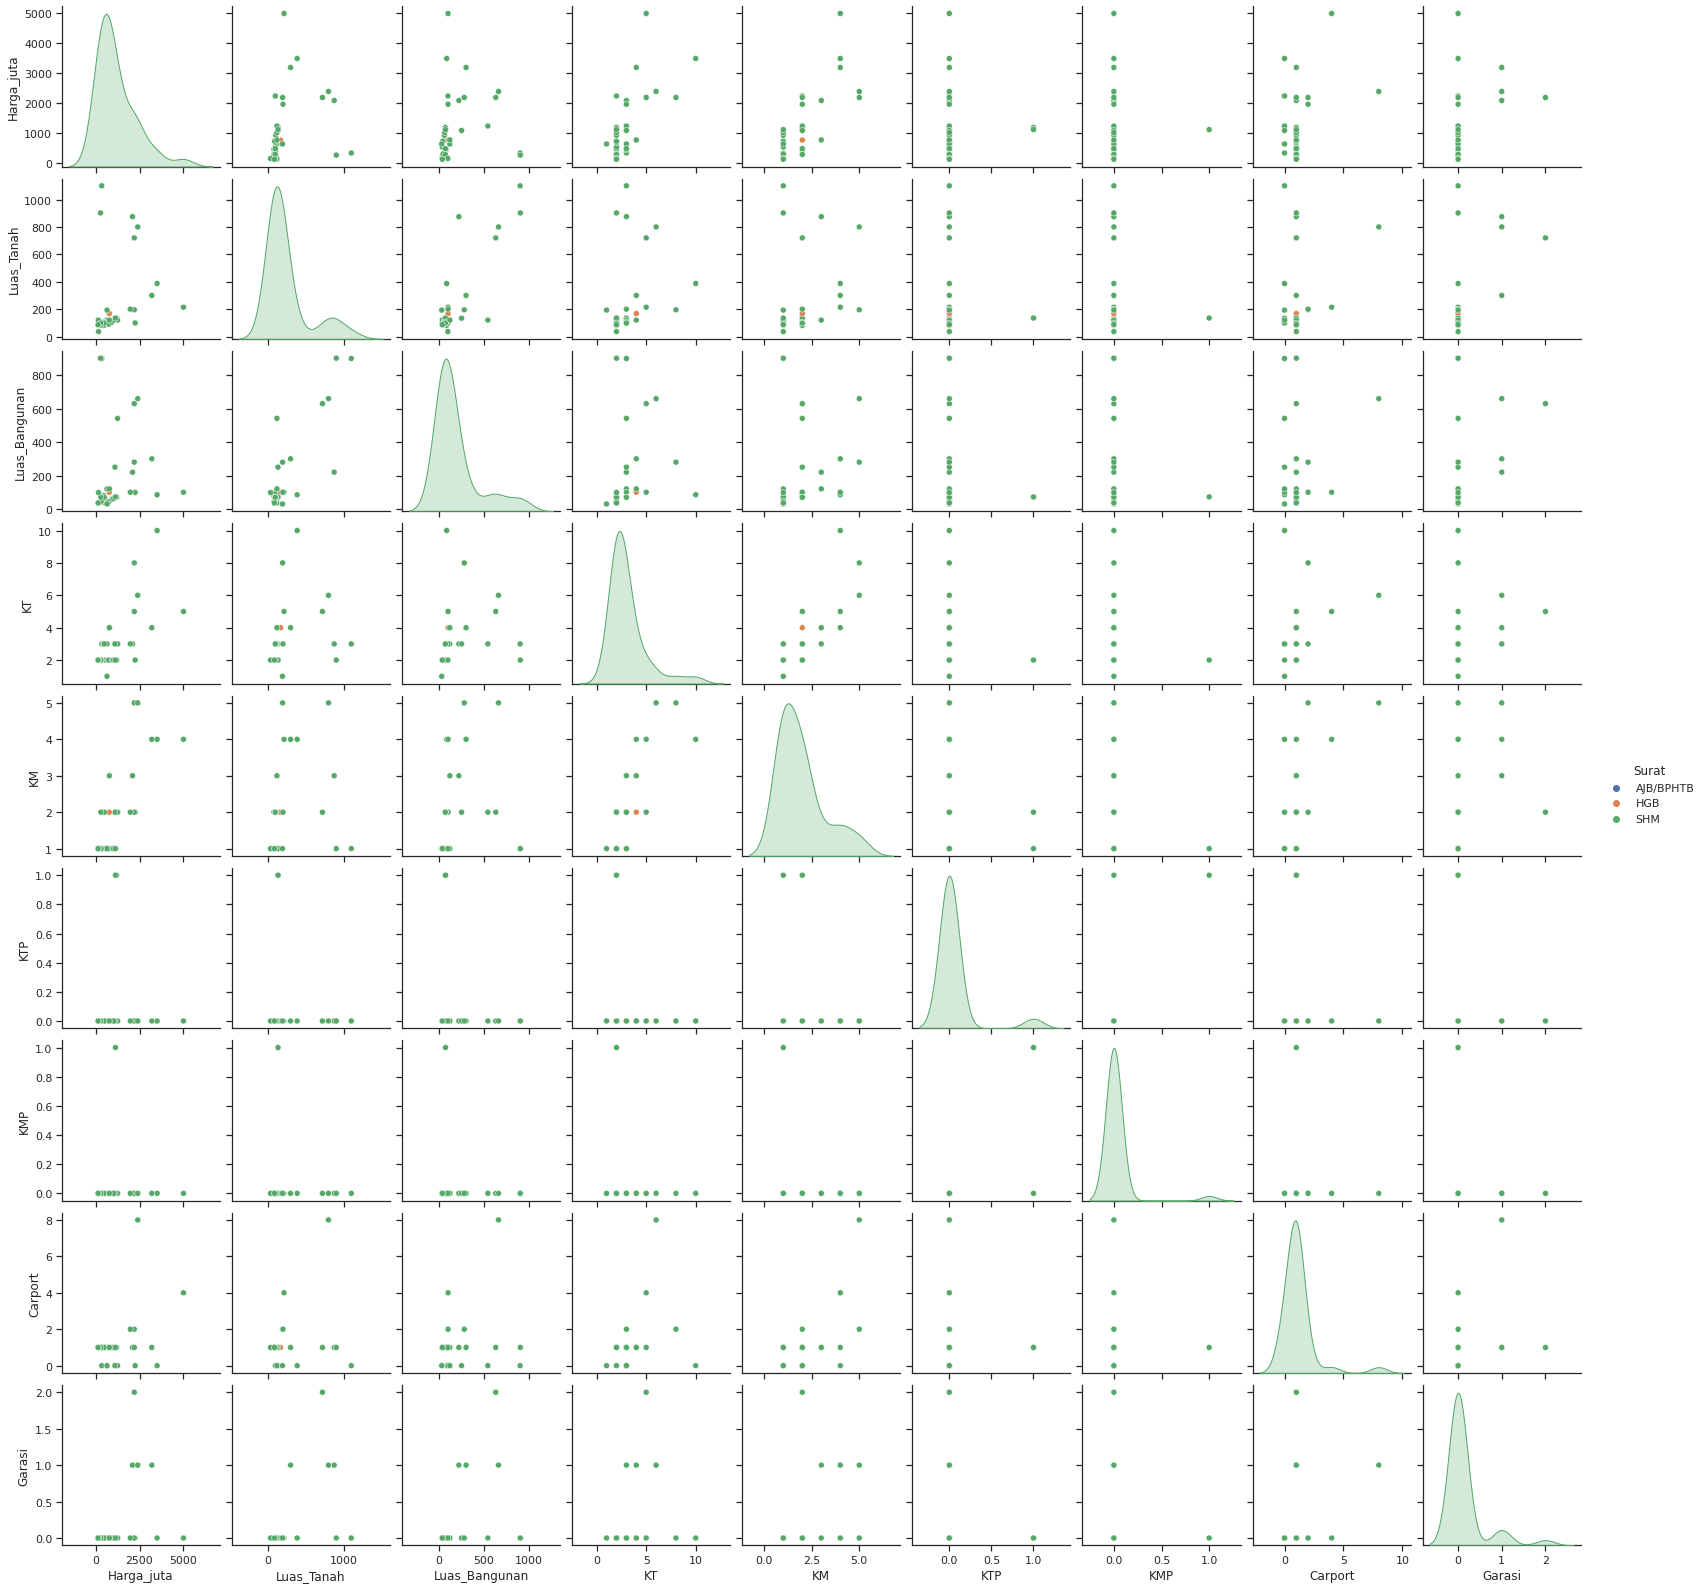

In [ ]:
g = sns.pairplot(X, hue="Surat")

###### Menghilangkan variabel-variabel yang tidak bertipe data numerik.

In [ ]:
X.drop(['Tgl_Iklan','url','Kota_Provinsi','Judul','Deskripsi'], axis=1, inplace=True)
X.head()

,Harga_juta,Luas_Tanah,Luas_Bangunan,KT,KM,KTP,KMP,Carport,Garasi,Surat
0,1200,135.0,70.0,2,2,1,0,1,0,SHM
1,1110,135.0,70.0,3,2,0,0,1,0,SHM
2,2100,875.0,220.0,3,3,0,0,1,1,SHM
4,1250,120.0,542.0,3,2,0,0,0,0,SHM
6,1100,134.0,250.0,3,2,0,0,0,0,SHM


# Scaling Data

In [ ]:
from sklearn import preprocessing

In [ ]:
minmax=preprocessing.MinMaxScaler().fit_transform(X.drop('Surat', axis=1))

In [ ]:
df5 = pd.DataFrame(minmax, index=X.index, columns=X.columns[:-1])

In [ ]:
df5

,Harga_juta,Luas_Tanah,Luas_Bangunan,KT,KM,KTP,KMP,Carport,Garasi
0,0.217946,0.093045,0.045872,0.111111,0.25,1.0,0.0,0.125,0.0
1,0.199424,0.093045,0.045872,0.222222,0.25,0.0,0.0,0.125,0.0
2,0.403169,0.788534,0.217890,0.222222,0.50,0.0,0.0,0.125,0.5
4,0.228236,0.078947,0.587156,0.222222,0.25,0.0,0.0,0.000,0.0
6,0.197366,0.092105,0.252294,0.222222,0.25,0.0,0.0,0.000,0.0
11,0.043013,1.000000,0.997706,0.222222,0.00,0.0,0.0,0.000,0.0
12,0.691295,0.329887,0.063073,1.000000,0.75,0.0,0.0,0.000,0.0
14,0.028607,0.813910,1.000000,0.111111,0.00,0.0,0.0,0.125,0.0
15,0.067709,0.042293,0.057339,0.111111,0.25,0.0,0.0,0.125,0.0
16,1.000000,0.167293,0.080275,0.444444,0.75,0.0,0.0,0.500,0.0


###### Berdasarkan output di atas, dapat terlihat bahwa dataset telah memiliki rentang nilai (scale) yang sama. Tidak ada lagi satu variabel data yang mendominasi variabel lainnya.

In [ ]:
df5.head()

,Harga_juta,Luas_Tanah,Luas_Bangunan,KT,KM,KTP,KMP,Carport,Garasi
0,0.217946,0.093045,0.045872,0.111111,0.25,1.0,0.0,0.125,0.0
1,0.199424,0.093045,0.045872,0.222222,0.25,0.0,0.0,0.125,0.0
2,0.403169,0.788534,0.217890,0.222222,0.50,0.0,0.0,0.125,0.5
4,0.228236,0.078947,0.587156,0.222222,0.25,0.0,0.0,0.000,0.0
6,0.197366,0.092105,0.252294,0.222222,0.25,0.0,0.0,0.000,0.0


In [ ]:
c_data = np.array(df5)
c_data[:5]

array([[0.21794608, 0.09304511, 0.04587156, 0.11111111, 0.25      ,
        1.        , 0.        , 0.125     , 0.        ],
       [0.19942375, 0.09304511, 0.04587156, 0.22222222, 0.25      ,
        0.        , 0.        , 0.125     , 0.        ],
       [0.40316938, 0.78853383, 0.21788991, 0.22222222, 0.5       ,
        0.        , 0.        , 0.125     , 0.5       ],
       [0.22823626, 0.07894737, 0.58715596, 0.22222222, 0.25      ,
        0.        , 0.        , 0.        , 0.        ],
       [0.19736571, 0.09210526, 0.25229358, 0.22222222, 0.25      ,
        0.        , 0.        , 0.        , 0.        ]])

# Elbow Curves

In [ ]:
from sklearn.cluster import KMeans

###### Selanjutnya, mencari jumlah optimal dari cluster(k) dengan menggunakan metode **Elbow Curve**.

Text(0.5, 1.0, 'Elbow curve')

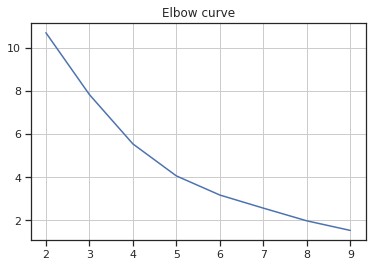

In [ ]:
distorsions, k1, kN = [], 2, 10
for k in range(k1, kN):
    kmeans = cluster.KMeans(n_clusters=k).fit(c_data)
    distorsions.append(kmeans.inertia_)
#fig = plt.figure(figsize=(15, 5))
plt.plot(range(k1, kN), distorsions); plt.grid(True)
plt.title('Elbow curve')

###### Terlihat bahwa lokasi "Siku" yang terbentuk di plot, terdapat pada titik 4 dan 5. 

# K-means

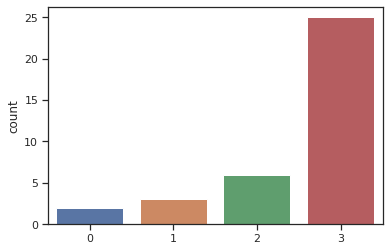

In [ ]:
# k-means: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
# Hapus "random_state = random_state" jika ingin melihat efek randomized centroid.
k = 4
km = cluster.KMeans(n_clusters=k, init='random', max_iter=300, tol=0.0001, n_jobs=-1, random_state = random_state)
km.fit(c_data)
# Hasil clusteringnya
C_km = km.predict(c_data)
p= sns.countplot(C_km)

##### Berdasarkan plot di atas, dapat dilihat frekuensi dari masing-masing cluster dengan k = 4 pada saat menggunakan k-means

In [ ]:
!pip install umap-learn[plot]
!pip install holoviews
!pip install -U ipykernel

     |████████████████████████████████| 15.8MB 259kB/s 
     |████████████████████████████████| 81kB 2.8MB/s 
     |████████████████████████████████| 112kB 47.9MB/s 
     |████████████████████████████████| 686kB 48.1MB/s 
  Created wheel for datashape: filename=datashape-0.5.2-cp37-none-any.whl size=59430 sha256=8ec2bdd99c8dec474ac78e18b6d50ff84bc577f23c6078f8b1829fe4427d390a
  Stored in directory: /root/.cache/pip/wheels/8d/06/05/c1cba3d57bdcfd3960e3f60a9fdc97e4baef2ef09af0ad1ef8
Successfully built datashape
ERROR: distributed 2021.4.0 has requirement cloudpickle>=1.5.0, but you'll have cloudpickle 1.3.0 which is incompatible.
ERROR: distributed 2021.4.0 has requirement dask>=2021.03.0, but you'll have dask 2.12.0 which is incompatible.
  Found existing installation: distributed 1.25.3
    Uninstalling distributed-1.25.3:
      Successfully uninstalled distributed-1.25.3
     |████████████████████████████████| 122kB 15.8MB/s 
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, 

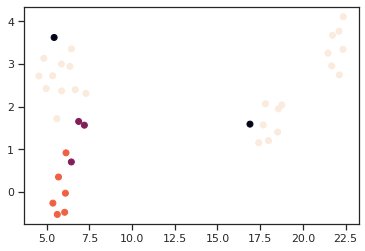

In [ ]:
X2D = umap.UMAP(n_neighbors=5, min_dist=0.3, random_state=random_state).fit_transform(c_data)
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_km)
plt.show()

###### Plot di atas merupakan hasil visualisasi saat data direduksi menjadi 2 dimensi dengan menggunakan UMAP.

In [ ]:
C_km

array([0, 3, 2, 3, 3, 1, 2, 1, 3, 2, 3, 3, 2, 2, 1, 2, 3, 3, 3, 3, 3, 3,
       3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

###### Output di atas merupakan hasil clustering dengan menggunakan K-Means

In [ ]:
km.inertia_

5.542022445307013

###### Diperoleh jumlah jarak setiap data ke centroid pada k-means sebesar 5.542022445307013

# K-means ++

array([0, 1, 2, 1, 1, 3, 2, 3, 1, 2], dtype=int32)

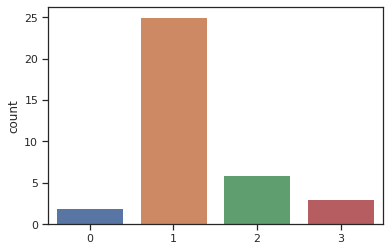

In [ ]:
# k-means++ clustering http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
k=4
kmPP = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, n_jobs=-1, random_state = random_state)
kmPP.fit(c_data)
C_kmpp = kmPP.predict(c_data)

sns.countplot(C_kmpp)
C_kmpp[:10]

##### Berdasarkan plot di atas, dapat dilihat frekuensi dari masing-masing cluster dengan k = 4 pada saat menggunakan k-means++

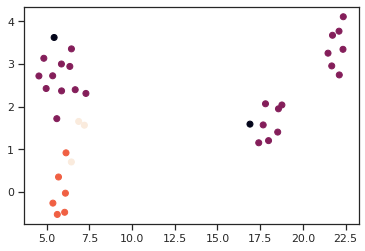

In [ ]:
X2D = umap.UMAP(n_neighbors=5, min_dist=0.3, random_state=random_state).fit_transform(c_data)
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_kmpp)
plt.show()

###### Plot di atas merupakan hasil visualisasi saat data direduksi menjadi 2 dimensi dengan menggunakan UMAP pada metode k-means++.

In [ ]:
kmPP.inertia_

5.542022445307013

###### Diperoleh jumlah jarak setiap data ke centroid pada k-means sebesar 5.542022445307013

In [ ]:
kmPP.cluster_centers_

array([[ 2.10742951e-01,  9.30451128e-02,  4.70183486e-02,
         1.11111111e-01,  1.25000000e-01,  1.00000000e+00,
         5.00000000e-01,  1.25000000e-01,  0.00000000e+00],
       [ 1.16196748e-01,  7.01879699e-02,  7.04128440e-02,
         1.55555556e-01,  1.20000000e-01, -2.08166817e-17,
        -1.04083409e-17,  1.05000000e-01,  1.38777878e-17],
       [ 6.02112918e-01,  4.00219298e-01,  2.80007645e-01,
         5.55555556e-01,  7.91666667e-01, -6.93889390e-18,
        -3.46944695e-18,  3.33333333e-01,  2.50000000e-01],
       [ 1.65123139e-01,  8.18922306e-01,  8.95259939e-01,
         2.59259259e-01,  8.33333333e-02,  0.00000000e+00,
         0.00000000e+00,  8.33333333e-02,  3.33333333e-01]])

# MiniBatch k-Means

array([2, 0, 1, 0, 0, 1, 3, 1, 0, 3], dtype=int32)

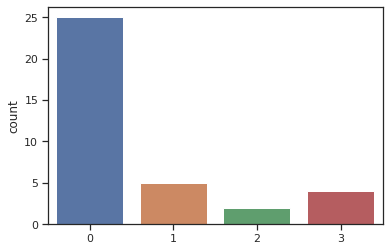

In [ ]:
# MiniBatch k-Means 
# http://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html
# minibatch "tidak bisa parallel"!!!...
# parameter penting km = batch_size ... pada aplikasi sesungguhnya disarankan "minimal" 3xk
mbkm = cluster.MiniBatchKMeans(n_clusters=k, init='random', max_iter=300, tol=0.0001, batch_size = 100, random_state = random_state) 
mbkm.fit(c_data)
C_mbkm = mbkm.predict(c_data)
sns.countplot(C_mbkm)
C_mbkm[:10]

##### Berdasarkan plot di atas, dapat dilihat frekuensi dari masing-masing cluster dengan k = 4 pada saat menggunakan MiniBatch k-means.

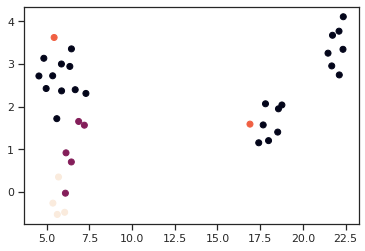

In [ ]:
X2D = umap.UMAP(n_neighbors=5, min_dist=0.3, random_state=random_state).fit_transform(c_data)
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_mbkm)
plt.show()

###### Plot di atas merupakan hasil visualisasi saat data direduksi menjadi 2 dimensi dengan menggunakan UMAP pada metode MiniBatch k-means.

In [ ]:
mbkm.inertia_

5.7966427011769825

###### Diperoleh jumlah jarak setiap data ke centroid pada MiniBatch k-means sebesar 5.7966427011769825

# MiniBatch k-Means++

array([1, 1, 0, 1, 1, 3, 2, 3, 1, 2], dtype=int32)

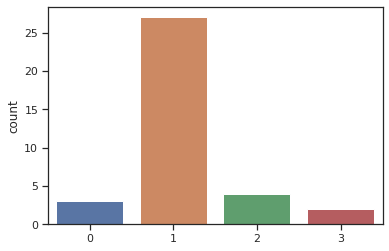

In [ ]:
# MiniBatch k-Means++
mbkmPP = cluster.MiniBatchKMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, random_state = random_state) 
mbkmPP.fit(c_data)
C_mbkmPP = mbkmPP.predict(c_data)
sns.countplot(C_mbkmPP)
C_mbkmPP[:10]

##### Berdasarkan plot di atas, dapat dilihat frekuensi dari masing-masing cluster dengan k = 4 pada saat menggunakan MiniBatch k-means++.

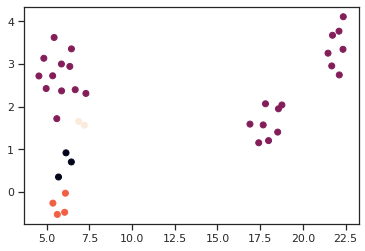

In [ ]:
X2D = umap.UMAP(n_neighbors=5, min_dist=0.3, random_state=random_state).fit_transform(c_data)
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_mbkmPP)
plt.show()

###### Plot di atas merupakan hasil visualisasi saat data direduksi menjadi 2 dimensi dengan menggunakan UMAP pada metode MiniBatch k-means++.

In [ ]:
mbkmPP.inertia_

6.636497974073268

###### Diperoleh jumlah jarak setiap data ke centroid pada MiniBatch k-means sebesar 6.636497974073268

# Silhouette Coefficient

In [ ]:
Hasil_Clustering = [C_km, C_kmpp, C_mbkm, C_mbkmPP]
for res in Hasil_Clustering:
    print(siluet(c_data,res), end=', ')
# Bagaimana cara kerja dan interpretasinya?

0.5742481316839961, 0.5742481316839961, 0.561655098274167, 0.5588700542171636, 

###### Hasil output di atas menunjukkan bahwa nilai Silhouette Coefficient pada setiap metode yang digunakan bernilai positif atau mendekati 1, maka keputusan pengelompokannya sudah benar.

In [ ]:
df5.columns

Index(['Harga_juta', 'Luas_Tanah', 'Luas_Bangunan', 'KT', 'KM', 'KTP', 'KMP',
       'Carport', 'Garasi'],
      dtype='object')

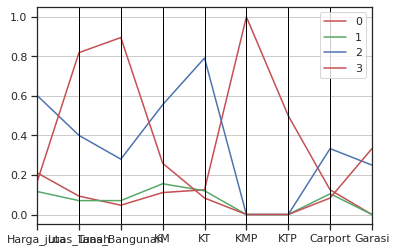

In [ ]:
# Evaluasi sebenarnya tidak terlalu penting di Unsupervised learning.
# inilah yang membedakan "clustering" dan "clustering Analysis"
# yang lebih penting adalah interpretasi, tapi Bagaimana?
# contoh k-means++

cols = ['Harga_juta','Luas_Tanah','Luas_Bangunan','KM','KT','KMP','KTP','Carport','Garasi']
dfC = pd.DataFrame(kmPP.cluster_centers_, columns=cols)
dfC['cluster'] = dfC.index

pd.plotting.parallel_coordinates(dfC, 'cluster', color=('r', 'g', 'b'))
plt.show()

In [ ]:
df5['cluster'] = kmPP.labels_
df5.head(50)

,Harga_juta,Luas_Tanah,Luas_Bangunan,KT,KM,KTP,KMP,Carport,Garasi,cluster
0,0.217946,0.093045,0.045872,0.111111,0.25,1.0,0.0,0.125,0.0,0
1,0.199424,0.093045,0.045872,0.222222,0.25,0.0,0.0,0.125,0.0,1
2,0.403169,0.788534,0.217890,0.222222,0.50,0.0,0.0,0.125,0.5,2
4,0.228236,0.078947,0.587156,0.222222,0.25,0.0,0.0,0.000,0.0,1
6,0.197366,0.092105,0.252294,0.222222,0.25,0.0,0.0,0.000,0.0,1
11,0.043013,1.000000,0.997706,0.222222,0.00,0.0,0.0,0.000,0.0,3
12,0.691295,0.329887,0.063073,1.000000,0.75,0.0,0.0,0.000,0.0,2
14,0.028607,0.813910,1.000000,0.111111,0.00,0.0,0.0,0.125,0.0,3
15,0.067709,0.042293,0.057339,0.111111,0.25,0.0,0.0,0.125,0.0,1
16,1.000000,0.167293,0.080275,0.444444,0.75,0.0,0.0,0.500,0.0,2


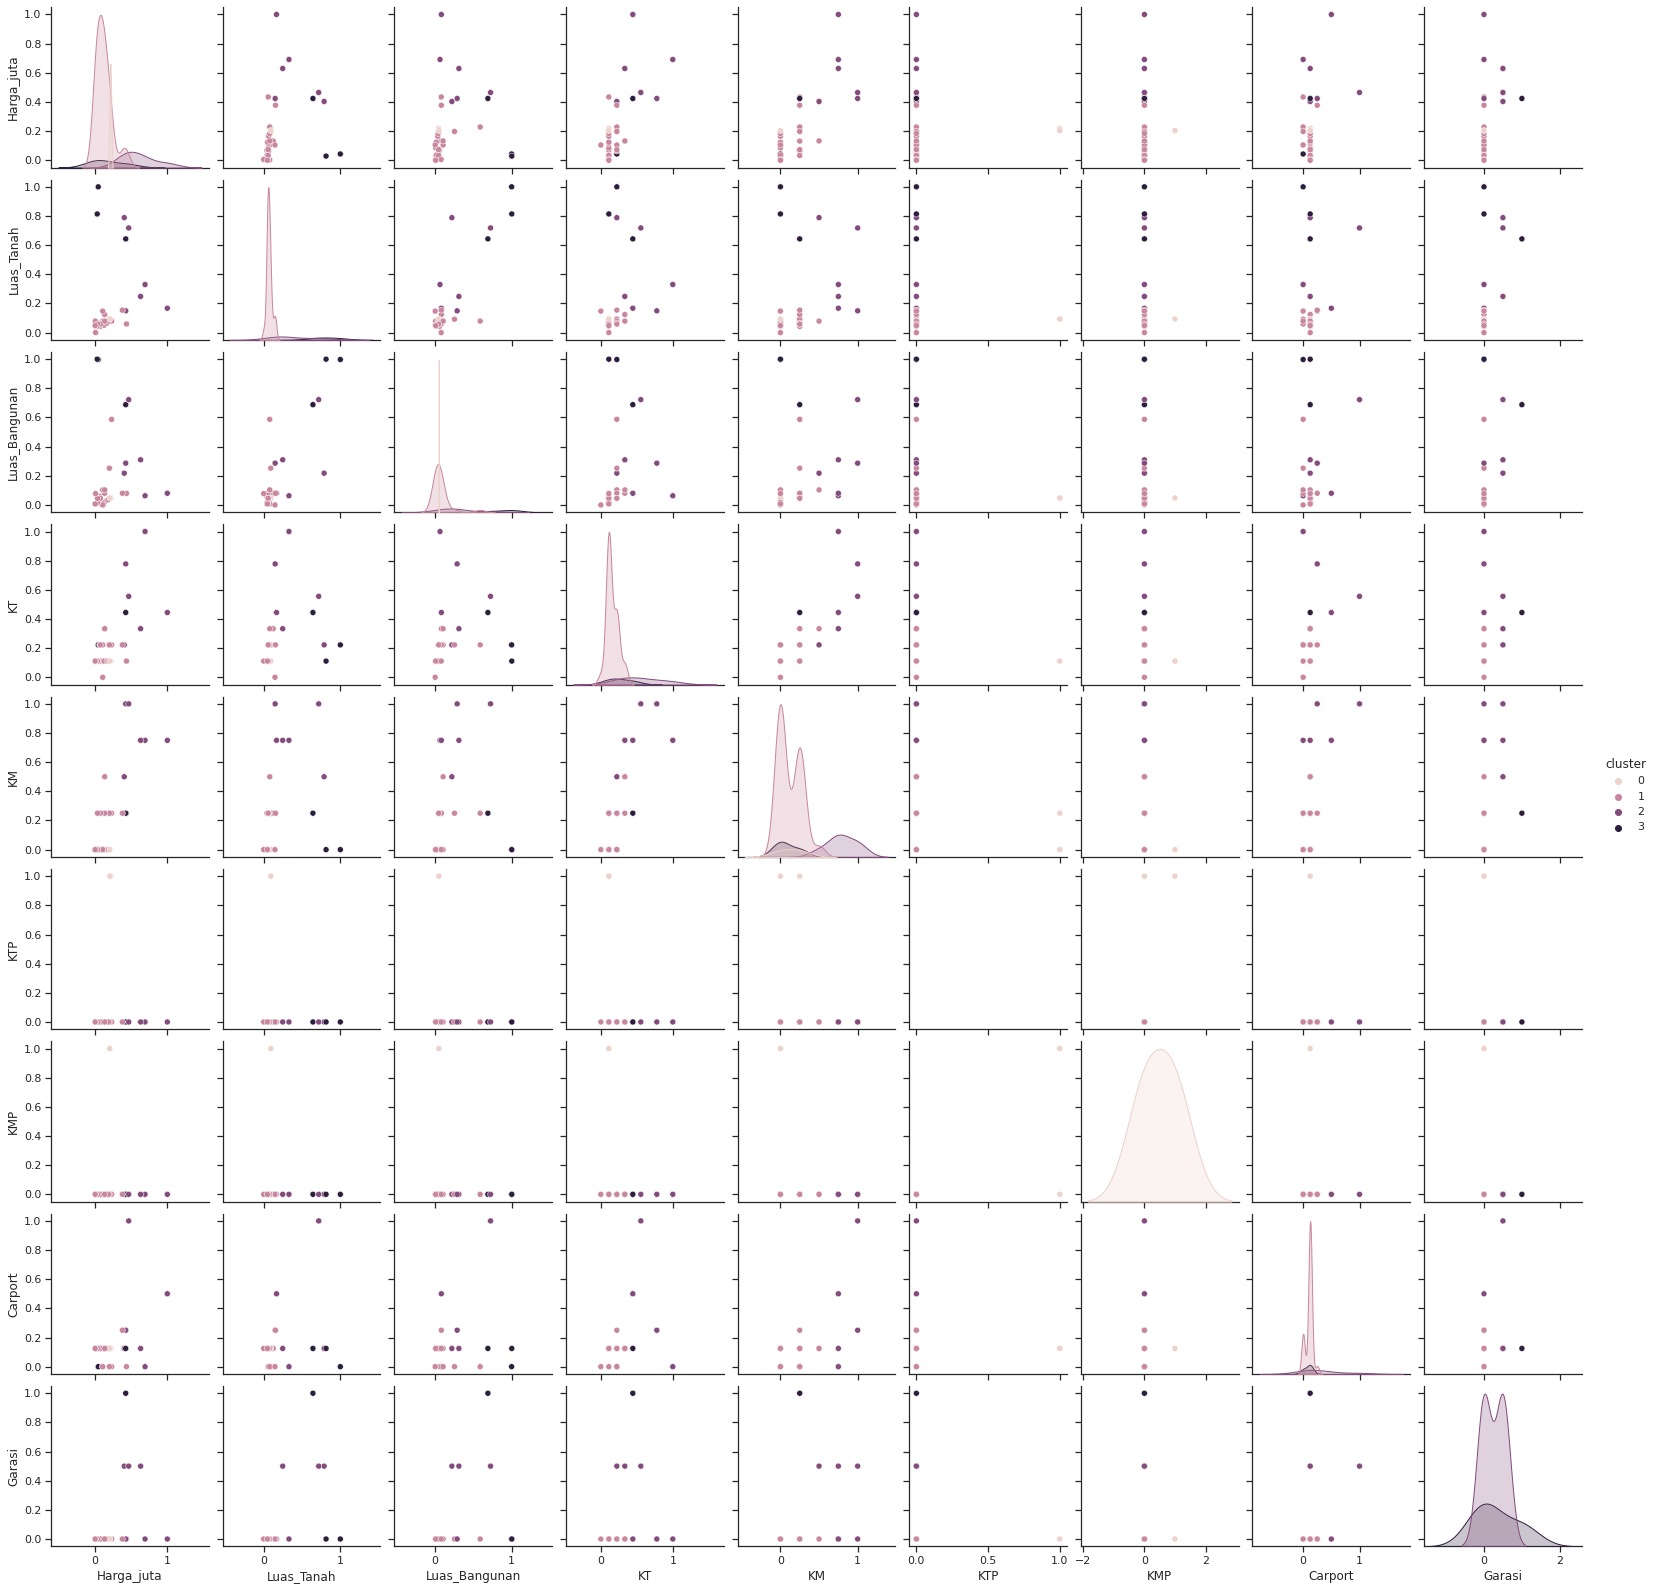

In [ ]:
sns.pairplot(df5, hue='cluster')